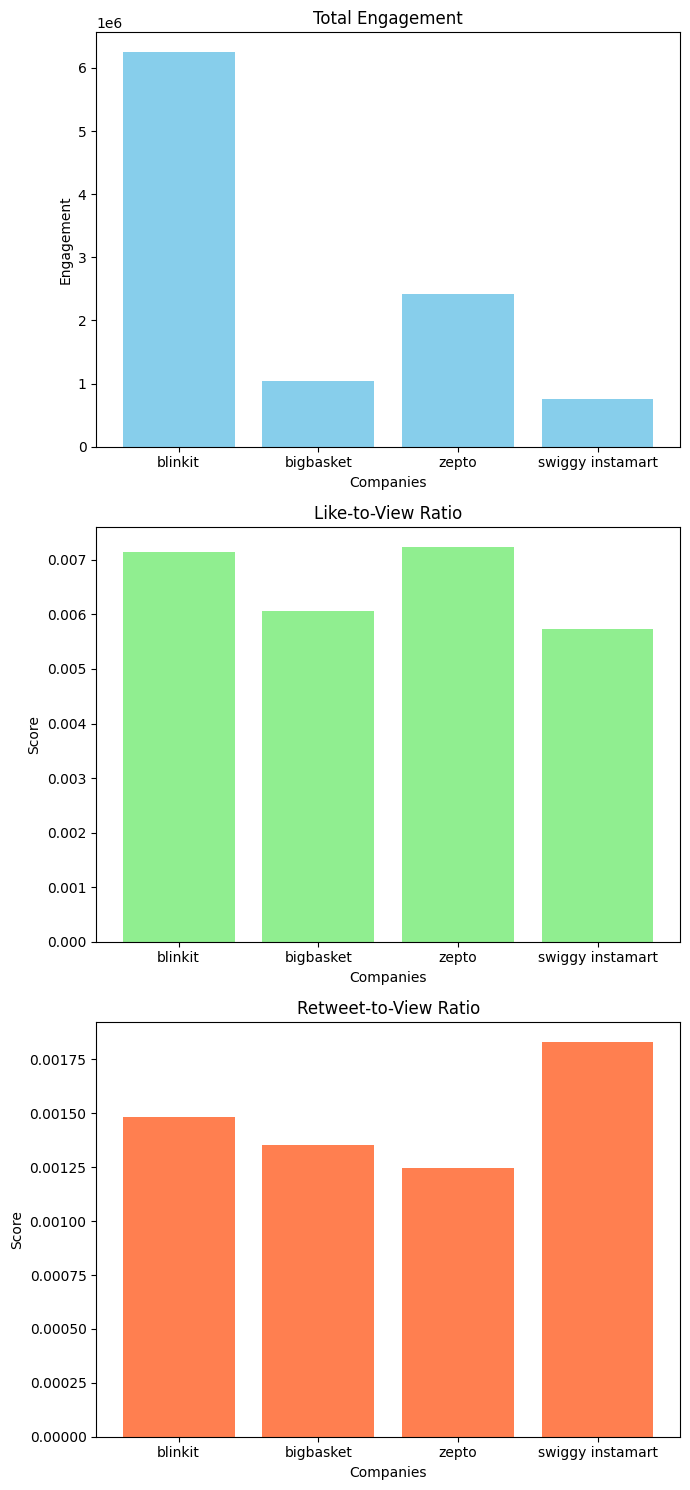

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ['blinkit_processed_tweets.csv', 'bigbasket_processed_tweets.csv', 'zepto_processed_tweets.csv', 'swiggyinstamart_processed_tweets.csv']
name_mapping = {
    "blinkit_processed_tweets.csv": "blinkit",
    "bigbasket_processed_tweets.csv": "bigbasket",
    "zepto_processed_tweets.csv": "zepto",
    "swiggyinstamart_processed_tweets.csv": "swiggy instamart"
}

# Initialize dictionaries to store the aggregated results
total_engagements = {}
total_like_to_view_ratios = {}
total_retweet_to_view_ratios = {}
dfs = {}

for file_path in file_paths:
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Check if required columns exist
    if not all(col in data.columns for col in ['likeCount', 'retweetCount', 'viewCount']):
        print(f"Missing columns in {file_path}")
        continue
    
    # Calculate Total Engagement for each tweet
    data['engagement'] = data['likeCount'] + data['retweetCount'] + data['viewCount']
    
    # Calculate Engagement Rates for each tweet, handling division by zero
    data['like_to_view_ratio'] = data.apply(
        lambda row: row['likeCount'] / row['viewCount'] if row['viewCount'] != 0 else 0, axis=1
    )
    data['retweet_to_view_ratio'] = data.apply(
        lambda row: row['retweetCount'] / row['viewCount'] if row['viewCount'] != 0 else 0, axis=1
    )
    
    # Get desired dataframe name from mapping
    df_name = name_mapping.get(file_path, None)
    
    # If there's a name mapping, store dataframe with that name
    if df_name:
        dfs[df_name] = data
        total_engagements[df_name] = data['engagement'].sum()
        total_like_to_view_ratios[df_name] = data['like_to_view_ratio'].mean()
        total_retweet_to_view_ratios[df_name] = data['retweet_to_view_ratio'].mean()

# Plotting
plt.figure(figsize=(7,15))

# Total Engagement Plot
plt.subplot(3, 1, 1)
plt.bar(total_engagements.keys(), total_engagements.values(), color='skyblue')
plt.title('Total Engagement')
plt.xlabel('Companies')
plt.ylabel('Engagement')

# Like-to-View Ratio Plot
plt.subplot(3, 1, 2)
plt.bar(total_like_to_view_ratios.keys(), total_like_to_view_ratios.values(), color='lightgreen')
plt.title('Like-to-View Ratio')
plt.xlabel('Companies')
plt.ylabel('Score')

# Retweet-to-View Ratio Plot
plt.subplot(3, 1, 3)
plt.bar(total_retweet_to_view_ratios.keys(), total_retweet_to_view_ratios.values(), color='coral')
plt.title('Retweet-to-View Ratio')
plt.xlabel('Companies')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [2]:
for company, df in dfs.items():
    print(f"Top 20 tweets with most engagement for {company}:")
    top_tweets = df.nlargest(20, 'engagement')
    for index, tweet in top_tweets.iterrows():
        print(f"Tweet {index + 1}:")
        print(f"   Engagement: {tweet['engagement']}")
        print(f"   Twitter URL: {tweet['twitterUrl']}")
    print("\n")

Top 20 tweets with most engagement for blinkit:
Tweet 2145:
   Engagement: 534381.0
   Twitter URL: https://twitter.com/ICICIBank/status/1689980209553145856
Tweet 2144:
   Engagement: 534379.0
   Twitter URL: https://twitter.com/ICICIBank/status/1689980209553145856
Tweet 2494:
   Engagement: 296543.0
   Twitter URL: https://twitter.com/swatic12/status/1704090196214432245
Tweet 2146:
   Engagement: 273810.0
   Twitter URL: https://twitter.com/FinFloww/status/1689980375433375744
Tweet 3075:
   Engagement: 224944.0
   Twitter URL: https://twitter.com/DealBeeOfficial/status/1725122935822983392
Tweet 3876:
   Engagement: 218679.0
   Twitter URL: https://twitter.com/FreeDeals_India/status/1751608584662819107
Tweet 4094:
   Engagement: 183561.0
   Twitter URL: https://twitter.com/kotaksecurities/status/1759149357494862022
Tweet 4095:
   Engagement: 183560.0
   Twitter URL: https://twitter.com/kotaksecurities/status/1759149357494862022
Tweet 4085:
   Engagement: 169412.0
   Twitter URL: https: